# About this dataset

"The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import seaborn as sns
from scipy import stats
import math
import warnings
# Suppress FutureWarning related to use_inf_as_na
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('possum.csv')

# getting to know the dataset 

will start by using panda's to look at the information contained in this dataset

In [20]:
new_col_names = ["Case", "Site_of_recording","Population_area", "Sex", "Age", "Head_length", "Skull_weight", "Total_length", "Tail_length", "Foot_length", "Ear_conch_length", "Eye", "Chest", "Belly"]
df.columns = new_col_names

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Case               104 non-null    int64  
 1   Site_of_recording  104 non-null    int64  
 2   Population_area    104 non-null    object 
 3   Sex                104 non-null    object 
 4   Age                102 non-null    float64
 5   Head_length        104 non-null    float64
 6   Skull_weight       104 non-null    float64
 7   Total_length       104 non-null    float64
 8   Tail_length        104 non-null    float64
 9   Foot_length        103 non-null    float64
 10  Ear_conch_length   104 non-null    float64
 11  Eye                104 non-null    float64
 12  Chest              104 non-null    float64
 13  Belly              104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [22]:
df["Population_area"].unique()

array(['Vic', 'other'], dtype=object)

In [23]:
mapping = {"Vic":0, "other":1}
df["Population_area"] = df["Population_area"].map(mapping)

In [24]:
df["Sex"].unique()

array(['m', 'f'], dtype=object)

In [25]:
mapping = {"m":0, "f":1}
df["Sex"] = df["Sex"].map(mapping)

In [26]:
df.describe()

,Case,Site_of_recording,Population_area,Sex,Age,Head_length,Skull_weight,Total_length,Tail_length,Foot_length,Ear_conch_length,Eye,Chest,Belly
count,104.000000,104.000000,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,0.557692,0.413462,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,0.499066,0.494839,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,0.000000,0.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,1.000000,0.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,1.000000,1.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [27]:
df.dropna(axis = 0, inplace = True)

In [28]:
numeric_cols = df.select_dtypes(include = ["float64", "int64"])

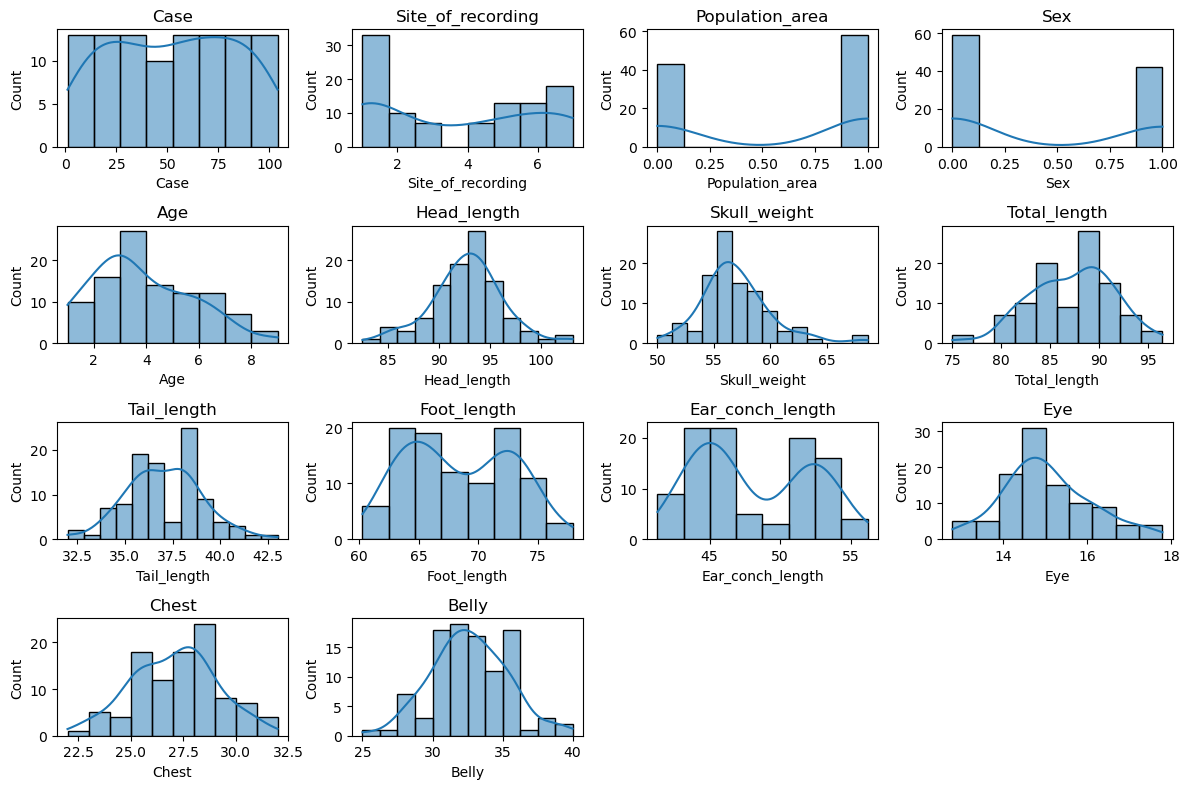

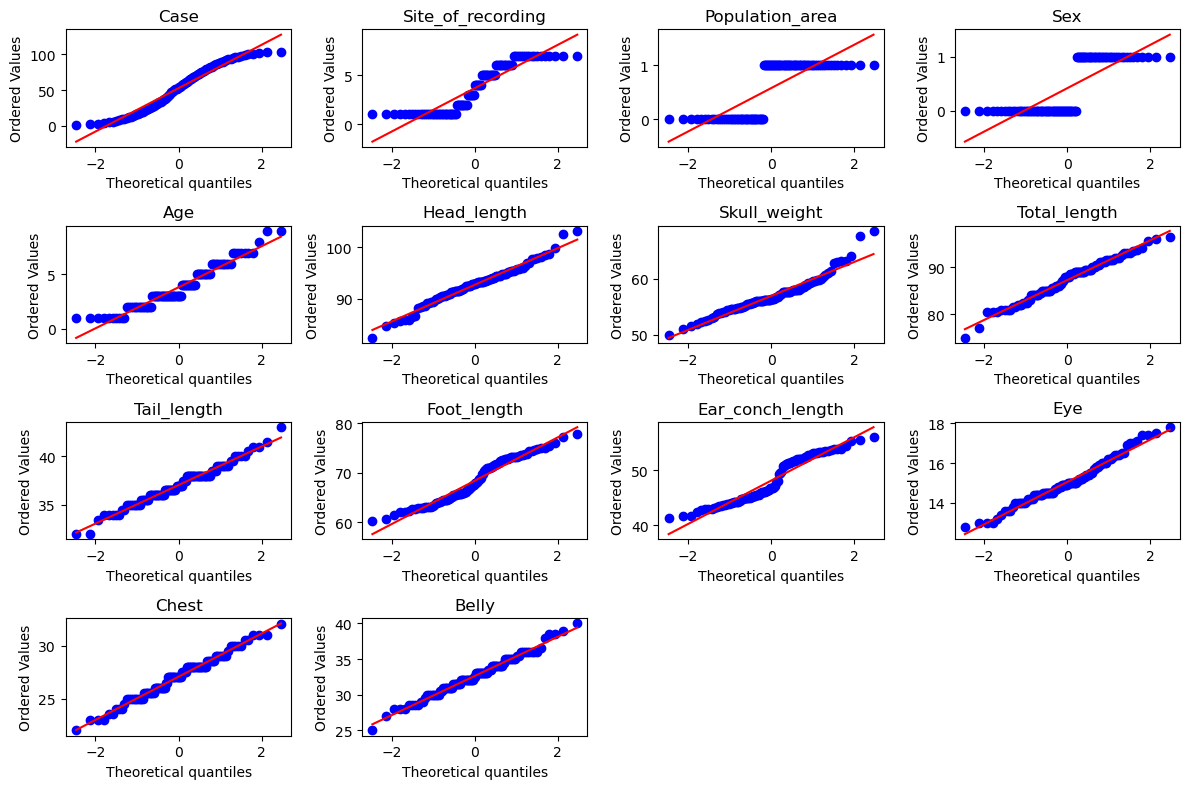

In [30]:
num_cols = len(numeric_cols.columns)
num_rows = math.ceil(num_cols / 4)  # Calculate number of rows needed

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust the number of rows
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust the number of rows
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()


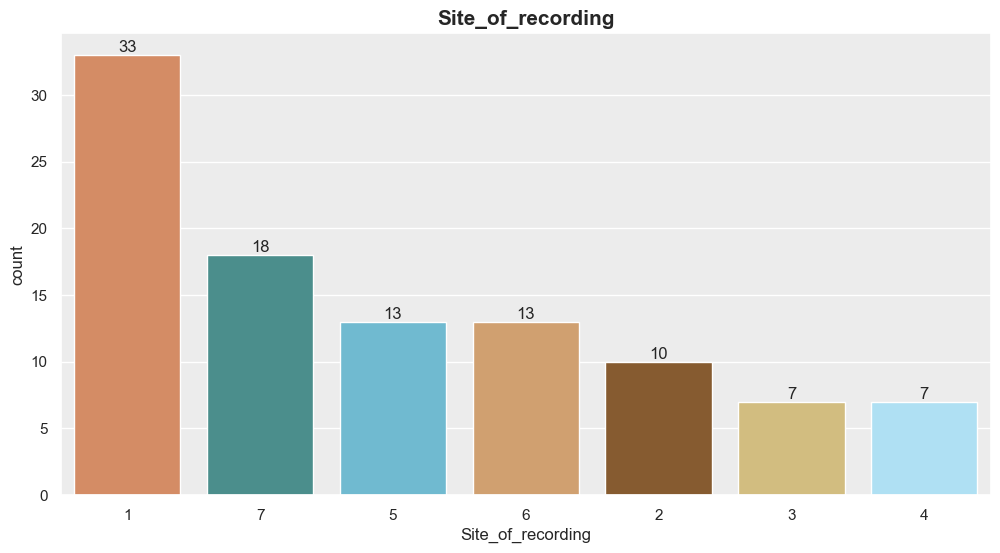

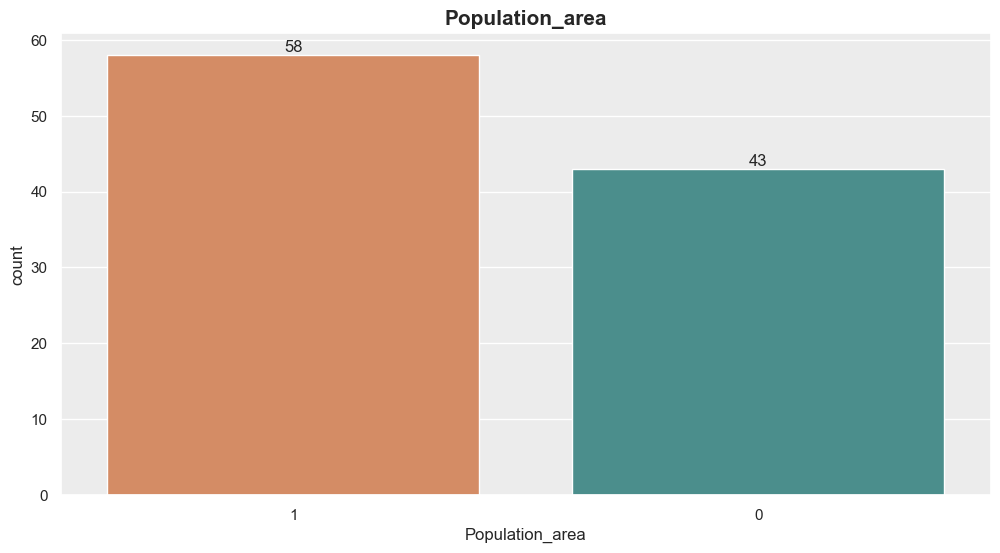

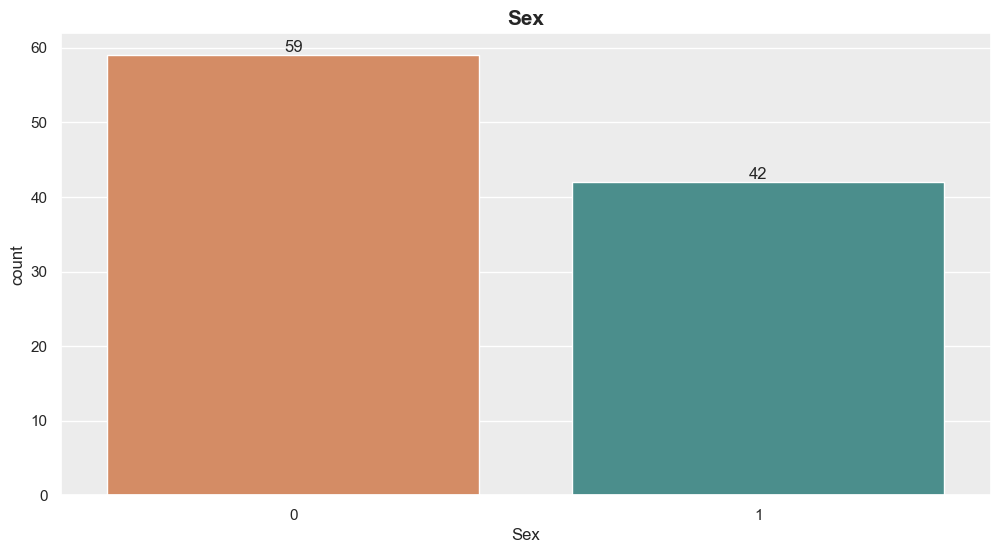

In [32]:
list_of_cat_variables = df[["Site_of_recording", "Population_area", "Sex"]]
palette = ['#E68753', '#409996', '#60C3E0', '#E0A060', '#945B22', '#E0C472', '#A3E5FF']

sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_variables:
    plt.figure(figsize = (12, 6))
    plt.title(feature, fontsize = 15, fontweight = "bold", ha = "center")
    ax = sns.countplot(x = df[feature], data = df, order = df[feature].value_counts().index, palette = palette)
    for container in ax.containers:
        ax.bar_label(container)
        plt.show()
